## Make anthropogenic emissions within the tropics [OPT] constant across the transient at 1995 values

In [1]:
import xarray as xr
import numpy as np 
import netCDF4 as nc
import pylab as plt

In [6]:

def subset_4d_array (dataset, lat, lat_range, lon, lon_range):
    """
    take a 4D data field and subset by lat, lon range
    """
    import numpy as np
    lat_min = lat_range[0]
    lat_max = lat_range[1]
    lat_max_idx = np.abs(lat - lat_max).argmin()
    lat_min_idx = np.abs(lat - lat_min).argmin()
    lon_min = lon_range[0]
    lon_min_idx = np.abs(lon - lon_min).argmin()
    lon_max = lon_range[1]
    lon_max_idx = np.abs(lon - lon_max).argmin()
    # subset the data into the months of interest and the lat region of interest
    datasubset = dataset[:,:,lat_min_idx:lat_max_idx, lon_min_idx:lon_max_idx]
    # take zonal mean
    #print lat_min_idx, lat_max_idx, lon_min_idx, lon_max_idx, np.shape(datasubset)
    return [lat_min_idx,lat_max_idx], [lon_min_idx,lon_max_idx], datasubset

def subset_3d_array (dataset, lat, lat_range, lon, lon_range):
    """
    take a 3D data field and do a zonal mean, i.e. across a latitude circle,
    over a given lat range
    i.e. zonal mean of 20S-20N datc
    """
    import numpy as np
    lat_min = lat_range[0]
    lat_max = lat_range[1]
    lat_max_idx = np.abs(lat - lat_max).argmin()
    lat_min_idx = np.abs(lat - lat_min).argmin()
    lon_min = lon_range[0]
    lon_min_idx = np.abs(lon - lon_min).argmin()
    lon_max = lon_range[1]
    lon_max_idx = np.abs(lon - lon_max).argmin()
    # subset the data into the months of interest and the lat region of interest
    datasubset = dataset[:,:,lat_min_idx:lat_max_idx, lon_min_idx:lon_max_idx]
    # take zonal mean
    #print lat_min_idx, lat_max_idx, lon_min_idx, lon_max_idx, np.shape(datasubset)
    return [lat_min_idx,lat_max_idx], [lon_min_idx,lon_max_idx], datasubset

def subset_2d_array (dataset, lat, lat_range, lon, lon_range):
    """
    take a 3D data field and do a zonal mean, i.e. across a latitude circle,
    over a given lat range
    i.e. zonal mean of 20S-20N datc
    """
    import numpy as np
    lat_min = lat_range[0]
    lat_max = lat_range[1]
    lat_max_idx = np.abs(lat - lat_max).argmin()
    lat_min_idx = np.abs(lat - lat_min).argmin()
    lon_min = lon_range[0]
    lon_min_idx = np.abs(lon - lon_min).argmin()
    lon_max = lon_range[1]
    lon_max_idx = np.abs(lon - lon_max).argmin()
    # subset the data into the months of interest and the lat region of interest
    datasubset = dataset[:,:,lat_min_idx:lat_max_idx, lon_min_idx:lon_max_idx]
    # take zonal mean
    #print lat_min_idx, lat_max_idx, lon_min_idx, lon_max_idx, np.shape(datasubset)
    return [lat_min_idx,lat_max_idx], [lon_min_idx,lon_max_idx], datasubset


In [7]:
lat_range=[-20,20]
lon_range=[0,360]

In [8]:
files = [
    'BC_biofuel_anthropogenic_1849_2015_time_series.nc',
    'BC_fossil_anthropogenic_1849_2015_time_series.nc',
    'C2H6_anthropogenic_1849_2015_time_series.nc',
    'C3H8_anthropogenic_1849_2015_time_series.nc',
    'CH4_anthropogenic_1849_2015_time_series.nc',
    'CO_anthropogenic_1849_2015_time_series.nc',
    'HCHO_anthropogenic_1849_2015_time_series.nc',
    'Me2CO_anthropogenic_1849_2015_time_series.nc',
    'MeCHO_anthropogenic_1849_2015_time_series.nc',
    'MeOH_anthropogenic_1849_2015_time_series.nc',
    'NH3_anthropogenic_1849_2015_time_series.nc',
    'NO_anthropogenic_1849_2015_time_series.nc',
    'NVOC_anthropogenic_1849_2015_time_series.nc',
    'OC_biofuel_anthropogenic_1849_2015_time_series.nc',
    'OC_fossil_anthropogenic_1849_2015_time_series.nc',
    'SO2_all_low_anthropogenic_1849_2015_time_series.nc',
    'SO2_high_anthropogenic_1849_2015_time_series.nc',
    'SO2_low_anthropogenic_1849_2015_time_series.nc'
    ]

variables = [
    'emissions_BC_biofuel',
    'emissions_BC_fossil',
    'emissions_C2H6',
    'emissions_C3H8',
    'emissions_CH4',
    'emissions_CO',
    'emissions_HCHO',
    'emissions_Me2CO',
    'emissions_MeCHO',
    'emissions_MeOH',
    'emissions_NH3',
    'emissions_NO',
    'emissions_NVOC',
    'emissions_OC_biofuel',
    'emissions_OC_fossil',
    'emissions_SO2_all_low_kgSO2',
    'emissions_SO2_high_kgSO2',
    'emissions_SO2_low_kgSO2'
]

In [17]:
np.shape(subset_CMIP6_anthro_tropical_data)

(253, 1, 32, 191)

In [9]:
# 1. take a base 1995 year
# 2. replace the inner section with the transient emissions

In [31]:
disk='/gws/nopw/j04/htap2/ptg21/OPT-emissions/constant_1995_global_ANTHRO/'
nyears = 21
ivar=0
for file,vari in zip(files,variables):
    ivar=ivar+1
    names = file.split('_')
    outfile = names[0]+'_'+names[1]
    print(outfile+'\n')
    CMIP6_anthro = xr.open_dataset(disk+file)
    # select data from 1995-2014 from ancil
    CMIP6_anthro_1995_2014 = CMIP6_anthro.sel(time = slice('1994-12-01','2016-01-01'))
    # get the 1995 data for use as constant emissisions within tropics
    CMIP6_anthro_1995_data = CMIP6_anthro_1995_2014.sel(time = slice('1994-12-01','1996-01-01'))[vari]
    # get subset of 1995 data over required lat and lon ranges
    lat_idxs, lon_idxs, subset_CMIP6_anthro_tropical_data = subset_4d_array(CMIP6_anthro_1995_2014[vari].data,
                                                        CMIP6_anthro_1995_2014['latitude'].data[:], lat_range,     
                                                        CMIP6_anthro_1995_2014['longitude'].data[:], lon_range)    
    # empty array to cover 1995-2014 for filling
    const_1995_ems  = np.ones((nyears*12+1,1,144,192))
    # fill with base data from transient 1995-2014
    const_1995_ems = np.array(CMIP6_anthro_1995_2014[vari].data) # good lord!  constant 1995_ems remains a dataarray object unless you do this.
    # make sure first element (i.e. december 1994) is available since 1995-01-01 requires it and ems are in the middle of the month!
    const_1995_ems[0:13,...] = CMIP6_anthro_1995_data.data[0:13,...] ## what going on here??
    for ivar in range (0,21):
    # write all data with constant 1995 data
        const_1995_ems[ivar*12+1:(ivar+1)*12+1,:,] = const_1995_ems[0:12,:,:,:]
    # THEN overwrite central tropical portion with time-varying historical emissions
    const_1995_ems[:,:,lat_idxs[0]:lat_idxs[1],lon_idxs[0]:lon_idxs[1]] = subset_CMIP6_anthro_tropical_data.data
    
    CMIP6_anthro_const_1995 = CMIP6_anthro_1995_2014.copy(deep=True)
    CMIP6_anthro_const_1995[vari].data[:] = const_1995_ems
    CMIP6_anthro_const_1995[vari].compute()
    CMIP6_anthro_const_1995.to_netcdf('1995_2015_'+vari+'_constant_extratropic.nc')

BC_biofuel

BC_fossil

C2H6_anthropogenic

C3H8_anthropogenic

CH4_anthropogenic

CO_anthropogenic

HCHO_anthropogenic

Me2CO_anthropogenic

MeCHO_anthropogenic

MeOH_anthropogenic

NH3_anthropogenic

NO_anthropogenic

NVOC_anthropogenic

OC_biofuel

OC_fossil

SO2_all

SO2_high

SO2_low



## sanity check - plot a map of base - perturbed at time point 228 - only variation should be within the tropics

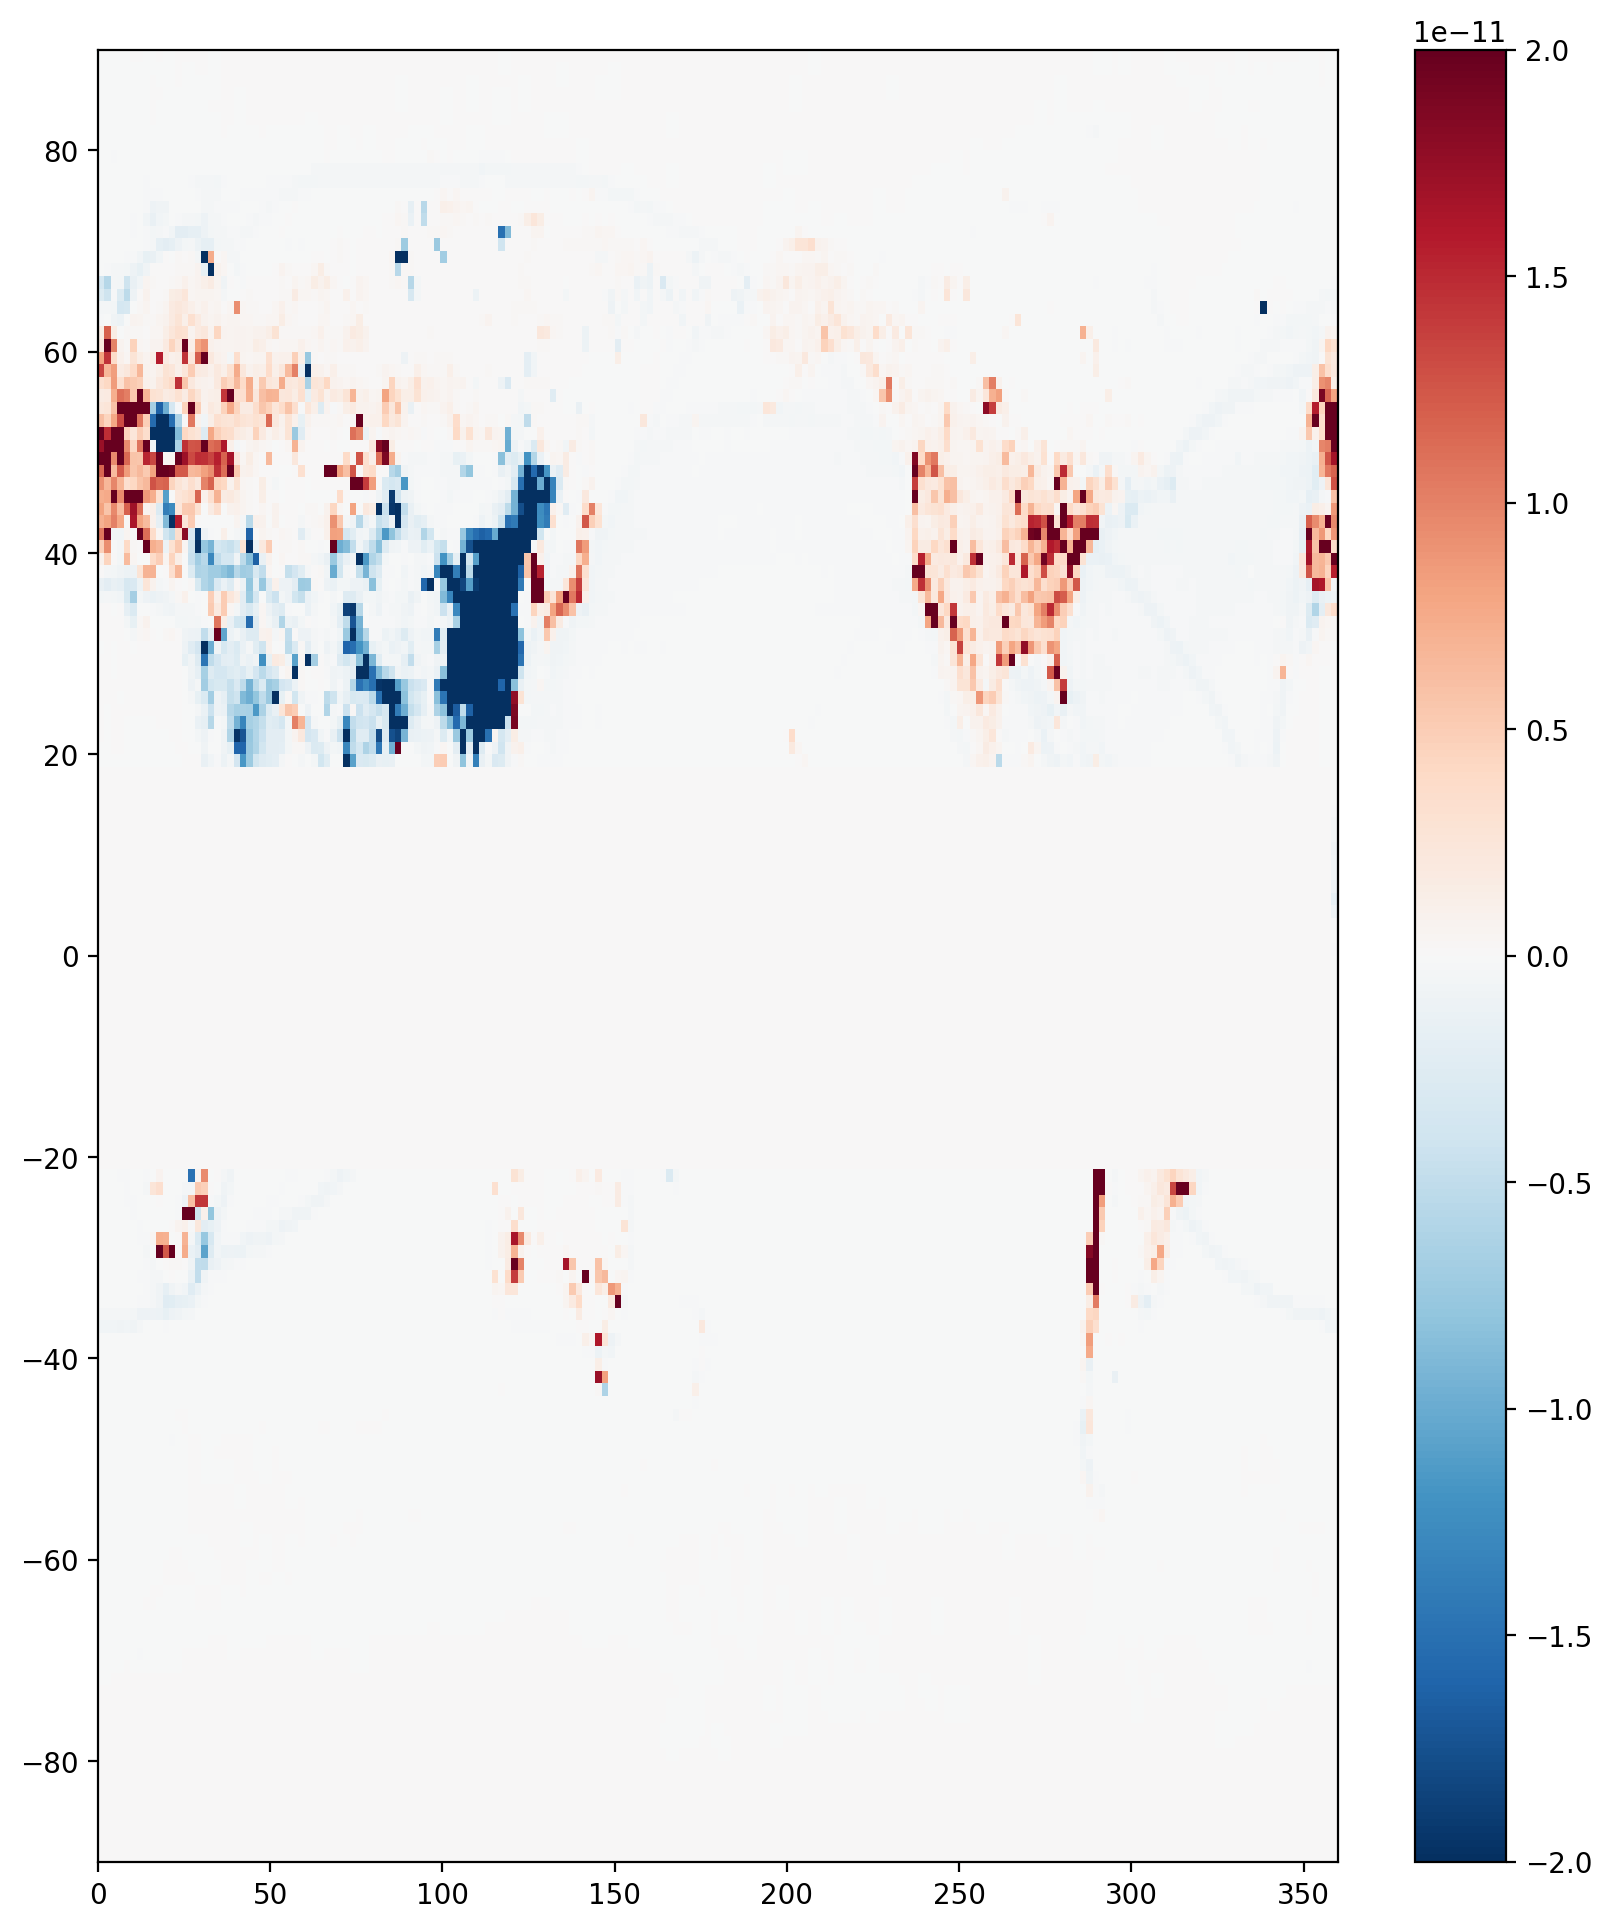

In [32]:
plt.figure(figsize=(10,12),dpi=200)
plt.pcolormesh(CMIP6_anthro_1995_data['longitude'].data[:],CMIP6_anthro_1995_data['latitude'].data[:],
               CMIP6_anthro_const_1995.emissions_SO2_low_kgSO2[228,0,:,:]-CMIP6_anthro_1995_2014.emissions_SO2_low_kgSO2[228,0,:,:],
               cmap='RdBu_r', vmin=-2e-11, vmax=2e-11)
plt.colorbar()

## Aircraft NOx are a special case as 3D field

In [33]:
files = ['NO_aircrft_anthropogenic_1849_2015_time_series.nc']
variables = ['emissions_NO_aircrft']

In [34]:
disk='/gws/nopw/j04/htap2/ptg21/OPT-emissions/constant_1995_global_ANTHRO/'
nyears = 21
ivar=0
for file,vari in zip(files,variables):
    ivar=ivar+1
    names = file.split('_')
    outfile = names[0]+'_'+names[1]
    print(outfile+'\n')
    CMIP6_anthro = xr.open_dataset(disk+file)
    # select data from 1995-2014 from ancil
    CMIP6_anthro_1995_2014 = CMIP6_anthro.sel(time = slice('1994-12-01','2016-01-01'))
    # get the 1995 data for use as constant emissisions within tropics
    CMIP6_anthro_1995_data = CMIP6_anthro_1995_2014.sel(time = slice('1994-12-01','1996-01-01'))[vari]
    # get subset of 1995 data over required lat and lon ranges
    lat_idxs, lon_idxs, subset_CMIP6_anthro_tropical_data = subset_4d_array(CMIP6_anthro_1995_2014[vari].data,
                                                        CMIP6_anthro_1995_2014['latitude'].data[:], lat_range,     
                                                        CMIP6_anthro_1995_2014['longitude'].data[:], lon_range)    
    # empty array to cover 1995-2014 for filling
    const_1995_ems  = np.ones((nyears*12+1,1,144,192))
    # fill with base data from transient 1995-2014
    const_1995_ems = np.array(CMIP6_anthro_1995_2014[vari].data) # good lord!  constant 1995_ems remains a dataarray object unless you do this.
    # make sure first element (i.e. december 1994) is available since 1995-01-01 requires it and ems are in the middle of the month!
    const_1995_ems[0:13,...] = CMIP6_anthro_1995_data.data[0:13,...] ## what going on here??
    for ivar in range (0,21):
    # write all data with constant 1995 data
        const_1995_ems[ivar*12+1:(ivar+1)*12+1,:,] = const_1995_ems[0:12,:,:,:]
    # THEN overwrite central tropical portion with time-varying historical emissions
    const_1995_ems[:,:,lat_idxs[0]:lat_idxs[1],lon_idxs[0]:lon_idxs[1]] = subset_CMIP6_anthro_tropical_data.data
    
    CMIP6_anthro_const_1995 = CMIP6_anthro_1995_2014.copy(deep=True)
    CMIP6_anthro_const_1995[vari].data[:] = const_1995_ems
    CMIP6_anthro_const_1995[vari].compute()
    CMIP6_anthro_const_1995.to_netcdf('1995_2015_'+vari+'_constant_extratropic.nc')

NO_aircrft

